In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import io
import requests
import zipfile
import urllib.request
import warnings
warnings.filterwarnings("ignore")

In [10]:
def download_and_read_data():
    """
    Tải và đọc dữ liệu từ Facebook (từ SNAP)
    """
    url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
    response = urllib.request.urlopen(url)
    zip_data = response.read()

    df = pd.read_csv(io.BytesIO(zip_data),
                     compression="gzip",
                     sep=" ",
                     names=["source", "target"])
    return df

In [11]:
def calculate_all_metrics(G):
  """
    Tính toán tất cả các số đo của đồ thị
    Args:
        G: Đồ thị NetworkX
    Returns:
        dict: Dictionary chứa các số đo của đồ thị
  """
  metrics = {}
  # 1. Thông tin cơ bản
  metrics['nodes'] = G.number_of_nodes()
  # |V|: Số lượng đỉnh trong đồ thị

  metrics['edges'] = G.number_of_edges()
  # |E|: Số lượng cạnh trong đồ thị

  metrics['density'] = nx.density(G)
  # Mật độ đồ thị
  # Công thức: D = 2|E| / (|V|(|V|-1))
  # Trong đó:
  # - |E|: số cạnh thực tế
  # - |V|(|V|-1): số cạnh tối đa có thể có trong đồ thị vô hướng

  metrics['average_degree'] = np.mean([d for n, d in G.degree()])

  # 2. Degree metrics
  degrees = dict(G.degree())
  metrics['avg_degree'] = sum(degrees.values()) / len(degrees)
  # Degree trung bình
  # Công thức: <k> = (1/|V|) * Σ ki
  # Trong đó:
  # - |V|: số lượng đỉnh
  # - ki: degree của đỉnh i
  # Note: Trong đồ thị vô hướng: <k> = 2|E|/|V|

  metrics['max_degree'] = max(degrees.values())
  metrics['degrees'] = degrees

  # 3. Degree Centrality
  dc = nx.degree_centrality(G)
  metrics['degree_centrality'] = {
      'values': dc,
      'max': max(dc.values()),
      'avg': sum(dc.values()) / len(dc),
      'node_max': max(dc, key=dc.get)
  }
  # Degree Centrality
  # Công thức: CD(v) = deg(v)/(|V|-1)
  # Trong đó:
  # - deg(v): degree của đỉnh v
  # - |V|-1: số lượng kết nối tối đa có thể có của một đỉnh

  # 4. Betweenness Centrality
  bc = nx.betweenness_centrality(G)
  metrics['betweenness_centrality'] = {
      'values': bc,
      'max': max(bc.values()),
      'avg': sum(bc.values()) / len(bc),
      'node_max': max(bc, key=bc.get)
  }
  # Betweenness Centrality
  # Công thức: CB(v) = Σ (σst(v)/σst)
  # Trong đó:
  # - σst: số đường đi ngắn nhất từ đỉnh s đến đỉnh t
  # - σst(v): số đường đi ngắn nhất từ s đến t đi qua v
  # - Tổng được tính trên mọi cặp đỉnh s,t khác v

  # 5. Closeness Centrality
  cc = nx.closeness_centrality(G)
  metrics['closeness_centrality'] = {
      'values': cc,
      'max': max(cc.values()),
      'avg': sum(cc.values()) / len(cc),
      'node_max': max(cc, key=cc.get)
  }
  # Closeness Centrality
  # Công thức: CC(v) = (|V|-1) / Σ d(v,u)
  # Trong đó:
  # - |V|-1: số đỉnh khác v
  # - d(v,u): độ dài đường đi ngắn nhất từ v đến u
  # - Tổng được tính trên mọi đỉnh u khác v

  # 6. PageRank
  pr = nx.pagerank(G, alpha=0.85)
  metrics['pagerank'] = {
      'values': pr,
      'max': max(pr.values()),
      'avg': sum(pr.values()) / len(pr),
      'node_max': max(pr, key=pr.get)
  }
  # PageRank
  # Công thức: PR(v) = (1-d) + d * Σ (PR(u)/OutDegree(u))
  # Trong đó:
  # - d: damping factor (thường = 0.85)
  # - PR(u): PageRank của các đỉnh u kề với v
  # - OutDegree(u): bậc ra của đỉnh u
  # - Tổng được tính trên mọi đỉnh u kề với v

  return metrics

In [22]:
def print_detailed_results(metrics):
  """
  In kết quả chi tiết của các phép đo
  """
  print("\n======== PHÂN TÍCH MẠNG XÃ HỘI ========= ")
  print("1. Thông tin cơ bản")
  print(f"- Số lượng nodes (người dùng): {metrics['nodes']}")
  print(f"- Số lượng cạnh (kết nối): {metrics['edges']}")
  print(f"- Mật độ: {metrics['density']}")
  print(f"- Degree trung bình: {metrics['average_degree']}")
  print(f"- Degree lớn nhất: {metrics['max_degree']}")

  centrality_measures = {
        'Degree Centrality': 'degree_centrality',
        'Betweenness Centrality': 'betweenness_centrality',
        'Closeness Centrality': 'closeness_centrality',
        'PageRank': 'pagerank'
    }

  print("2. Các số đo Centrality")
  for name, measure in centrality_measures.items():
    print(f"- {name}")
    print(f"- Giá trị lớn nhất: {metrics[measure]['max']:.4f}")
    print(f"- Giá trị trung bình: {metrics[measure]['avg']:.4f}")
    print(f"- Node có giá trị cao nhất: {metrics[measure]['node_max']}")

In [13]:
  # Tải dữ liệu và tạo đồ thị
df = download_and_read_data()
df.head()
G = nx.from_pandas_edgelist(df, "source", "target")
metrics = calculate_all_metrics(G)
print_detailed_results(metrics)


======== PHÂN TÍCH MẠNG XÃ HỘI ========= 
1. Thông tin cơ bản
- Số lượng nodes (người dùng): 4039
- Số lượng cạnh (kết nối): 88234
- Mật độ: 0.010819963503439287
- Degree trung bình: 43.69101262688784
- Degree lớn nhất: 1045
2. Các số đo Centrality
- Degree Centrality
- Giá trị lớn nhất: 0.2588
- Giá trị trung bình: 0.0108
- Node có giá trị cao nhất: 107
- Betweenness Centrality
- Giá trị lớn nhất: 0.4805
- Giá trị trung bình: 0.0007
- Node có giá trị cao nhất: 107
- Closeness Centrality
- Giá trị lớn nhất: 0.4597
- Giá trị trung bình: 0.2762
- Node có giá trị cao nhất: 107
- PageRank
- Giá trị lớn nhất: 0.0076
- Giá trị trung bình: 0.0002
- Node có giá trị cao nhất: 3437


# dánh giá chỉ số

In [20]:
# def evaluate_metric(value, metric_name):
#     """
#     Đánh giá giá trị metric dựa trên ngưỡng lý thuyết của từng độ đo
#     value: float - Giá trị của metric
#     metric_name: str - Tên của độ đo
#     """
#     thresholds = {
#         "density": {"low": 0.1, "high": 0.3},
#         "degree_centrality": {"low": 0.05, "high": 0.1},
#         "betweenness_centrality": {"low": 0.01, "high": 0.1},
#         "closeness_centrality": {"low": 0.2, "high": 0.4},
#         "pagerank": {"low": 0.05, "high": 0.2}
#     }

#     # Lấy ngưỡng cho độ đo cụ thể
#     metric_thresholds = thresholds.get(metric_name)
#     if not metric_thresholds:
#         return "Không xác định"

#     if value <= metric_thresholds["low"]:
#         return "Thấp"
#     elif value <= metric_thresholds["high"]:
#         return "Trung bình"
#     else:
#         return "Cao"


# def print_detailed_results(metrics):
#     """
#     In kết quả chi tiết của các phép đo trong phân tích mạng xã hội, kèm theo đánh giá
#     """
#     print("\n======== PHÂN TÍCH MẠNG XÃ HỘI ========= ")

#     # Phần 1: Thông tin cơ bản
#     print("\n1. Thông tin cơ bản")
#     print(f"- Số lượng nodes (người dùng): {metrics['nodes']}")
#     print(f"- Số lượng cạnh (kết nối): {metrics['edges']}")
#     print(f"- Mật độ (density): {metrics['density']:.4f} ({evaluate_metric(metrics['density'], 'density')})")
#     print(f"- Degree trung bình: {metrics['average_degree']:.4f}")
#     print(f"- Degree lớn nhất: {metrics['max_degree']}")
#     print(f"- Node có Degree lớn nhất: {metrics['node_max_degree']}")

#     # Phần 2: Các số đo Centrality
#     centrality_measures = {
#         'Degree Centrality': 'degree_centrality',
#         'Betweenness Centrality': 'betweenness_centrality',
#         'Closeness Centrality': 'closeness_centrality',
#         'PageRank': 'pagerank'
#     }

#     print("\n2. Các số đo Centrality")
#     for name, measure in centrality_measures.items():
#         # Kiểm tra nếu có giá trị cho phép đo cụ thể
#         if measure not in metrics:
#             print(f"- {name}: Không có dữ liệu")
#             continue

#         max_value = metrics[measure].get('max', None)
#         avg_value = metrics[measure].get('avg', None)
#         node_max = metrics[measure].get('node_max', "Không xác định")

#         # Kiểm tra nếu không có giá trị max hoặc avg
#         if max_value is None or avg_value is None:
#             print(f"- {name}: Dữ liệu không đầy đủ")
#         else:
#             avg_evaluation = evaluate_metric(avg_value, measure)
#             print(f"- {name}")
#             print(f"  - Giá trị lớn nhất: {max_value:.4f})")
#             print(f"  - Giá trị trung bình: {avg_value:.4f}")
#             print(f"  - Node có giá trị cao nhất: {node_max}")

In [23]:
print_detailed_results(metrics)


======== PHÂN TÍCH MẠNG XÃ HỘI ========= 
1. Thông tin cơ bản
- Số lượng nodes (người dùng): 4039
- Số lượng cạnh (kết nối): 88234
- Mật độ: 0.010819963503439287
- Degree trung bình: 43.69101262688784
- Degree lớn nhất: 1045
2. Các số đo Centrality
- Degree Centrality
- Giá trị lớn nhất: 0.2588
- Giá trị trung bình: 0.0108
- Node có giá trị cao nhất: 107
- Betweenness Centrality
- Giá trị lớn nhất: 0.4805
- Giá trị trung bình: 0.0007
- Node có giá trị cao nhất: 107
- Closeness Centrality
- Giá trị lớn nhất: 0.4597
- Giá trị trung bình: 0.2762
- Node có giá trị cao nhất: 107
- PageRank
- Giá trị lớn nhất: 0.0076
- Giá trị trung bình: 0.0002
- Node có giá trị cao nhất: 3437


# Vẽ đồ thị cơ bản
so sánh chỉ số

Thêm điều kiện cho các chỉ số

Nhận xét mạng xã hội
degree distribution, centrality Comparision, Top nodes Comparision

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_distribution(G):
    """
    Vẽ phân phối degree của đồ thị.
    Args:
        G: Đồ thị NetworkX
    """
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), alpha=0.75, color='b', edgecolor='black')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [25]:
def plot_centrality_comparison(G, metrics):
    """
    Vẽ biểu đồ so sánh các giá trị centrality (Degree, Betweenness, Closeness, PageRank).
    Args:
        G: Đồ thị NetworkX
        metrics: Dictionary chứa các chỉ số từ `calculate_all_metrics`
    """
    centralities = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']

    plt.figure(figsize=(10, 6))

    for centrality in centralities:
        values = metrics[centrality]['values']
        sorted_values = sorted(values.values(), reverse=True)
        plt.plot(sorted_values, label=centrality.replace('_', ' ').title(), lw=2)

    plt.title('Centrality Comparison')
    plt.xlabel('Nodes')
    plt.ylabel('Centrality Value')
    plt.legend()
    plt.grid(True)
    plt.show()


In [27]:
def plot_top_nodes_comparison(G, metrics):
    """
    Vẽ biểu đồ so sánh các giá trị centrality của 10 node có giá trị cao nhất.
    Args:
        G: Đồ thị NetworkX
        metrics: Dictionary chứa các chỉ số từ `calculate_all_metrics`
    """
    top_n = 10  # Số lượng node top
    centralities = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']

    plt.figure(figsize=(12, 8))

    for centrality in centralities:
        # Lấy các giá trị centrality của node và sắp xếp theo thứ tự giảm dần
        top_nodes = sorted(metrics[centrality]['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]
        nodes, values = zip(*top_nodes)
        plt.bar(nodes, values, alpha=0.7, label=centrality.replace('_', ' ').title())

    plt.title('Top Nodes Comparison')
    plt.xlabel('Nodes')
    plt.ylabel('Centrality Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


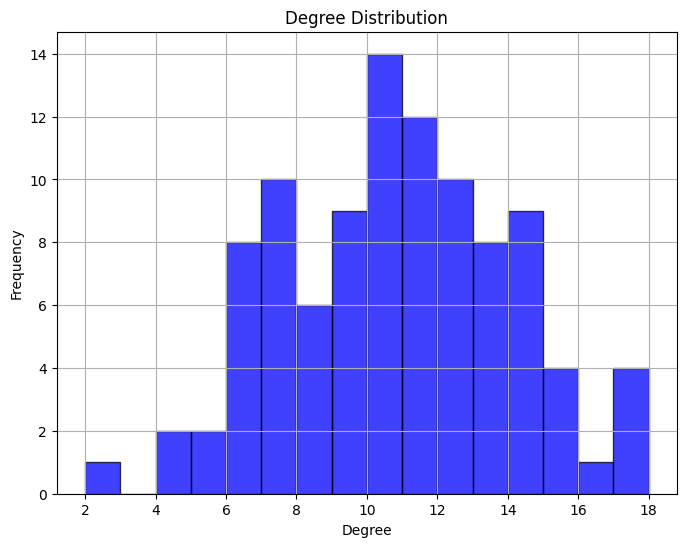

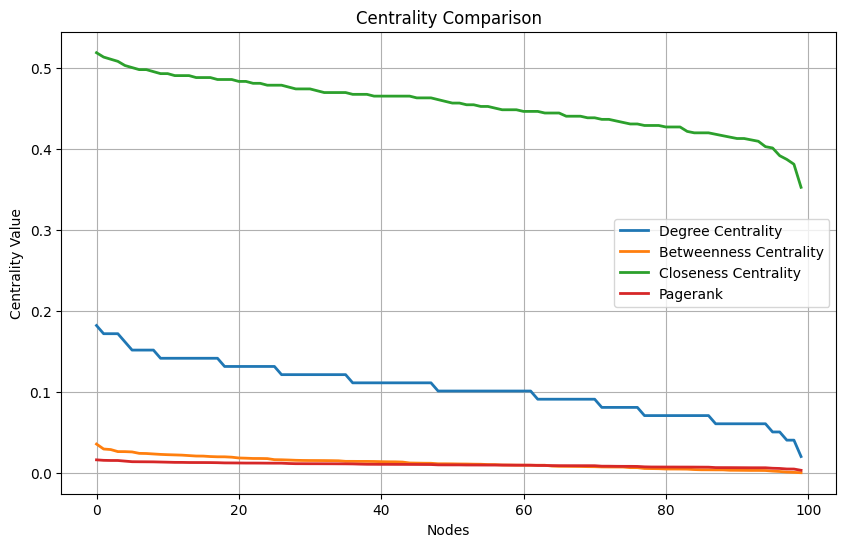

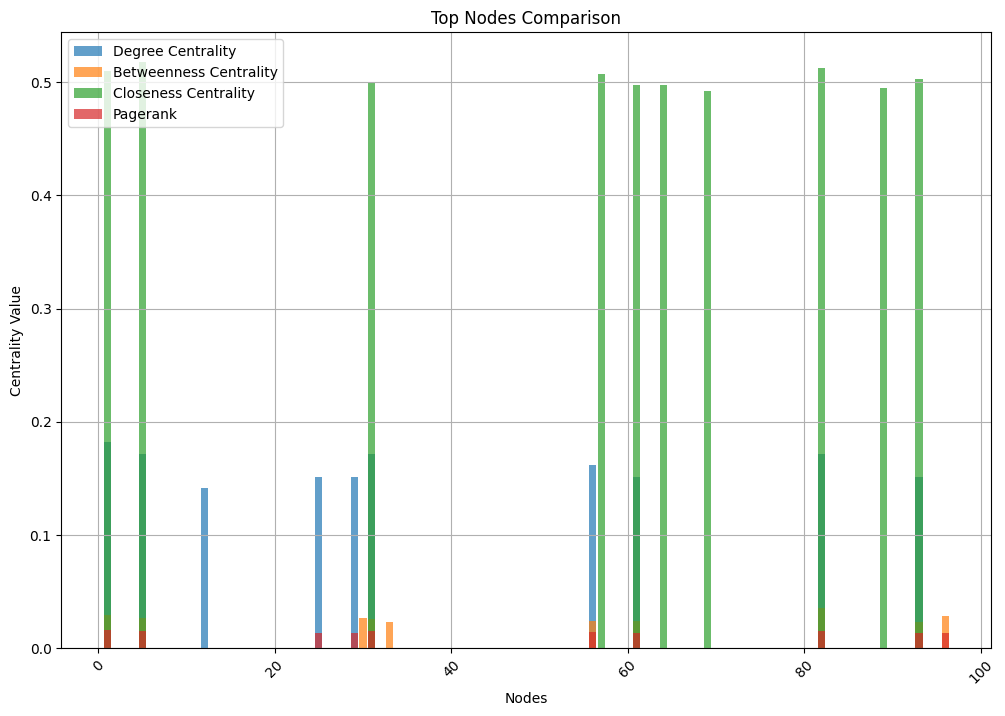

In [28]:
# Tạo đồ thị mẫu
G = nx.erdos_renyi_graph(100, 0.1)  # Đồ thị ngẫu nhiên với 100 node và tỷ lệ kết nối 0.1

# Tính toán các chỉ số
metrics = calculate_all_metrics(G)

# Vẽ Degree Distribution
plot_degree_distribution(G)

# Vẽ So sánh các giá trị Centrality
plot_centrality_comparison(G, metrics)

# Vẽ So sánh các Node hàng đầu theo các chỉ số Centrality
plot_top_nodes_comparison(G, metrics)
